In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from datetime import date, datetime, timedelta


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
from dotenv import load_dotenv
load_dotenv()

api_key=os.environ["NEWS_API_KEY"]

In [5]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key) #=os.environ["NEWS_API_KEY"])

In [6]:
# Fetch the Bitcoin news articles
current_date = str(date.today())
past_date = str(date.today() - timedelta(weeks=4))

bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en", from_param=current_date, to=past_date, sort_by="relevancy")

bitcoin_news["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Violet Blue',
 'title': "Twitter's Bitcoin hackers had almost limitless access",
 'description': 'On Wednesday, July 15, Twitter was the target of a very public hack attack that’s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world’…',
 'url': 'https://www.engadget.com/twitter-bitcoin-scam-social-engineering-hack-access-193040357.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-07%2Fca68c900-c85d-11ea-b9df-6238180027a8&client=amp-blogside-v2&signature=9b0fbb183070e467429323ab75f41cbbe1c8dbc3',
 'publishedAt': '2020-07-17T19:30:40Z',
 'content': 'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the accou

In [7]:
# Fetch the Ethereum news articles

ethereum_news = newsapi.get_everything(q="Ethereum", language="en", from_param=current_date, to=past_date, sort_by="relevancy")

ethereum_news["articles"][0]

{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Banks Can Now Hold Cryptocurrencies, As a Treat',
 'description': 'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.Read more...',
 'url': 'https://gizmodo.com/banks-can-now-hold-cryptocurrencies-as-a-treat-1844473085',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/ur0b3oxdebji9s0boue7.jpg',
 'publishedAt': '2020-07-22T21:45:00Z',
 'content': 'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars]'}

In [8]:
# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Create function that computes average compound sentiment of headlines for each day
def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for day in headlines:
        day_score = []
        for h in day:
            if h == None:
                continue
            else:
                day_score.append(sid.polarity_scores(h)["compound"])
        sentiment.append(sum(day_score) / len(day_score))
    return sentiment

In [9]:
def sentiments(news_articles):
    sentiments = []

    for article in news_articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })

        except AttributeError:
            pass
        
    return sentiments

In [10]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_df = pd.DataFrame(sentiments(bitcoin_news))

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...


In [11]:
# Create the Ethereum  sentiment scores DataFrame

ethereum_df = pd.DataFrame(sentiments(ethereum_news))

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...
1,-0.6808,0.177,0.823,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...
2,0.0000,0.000,1.000,0.000,Crypto has been on a tear in the last week.\r\...
3,-0.4215,0.083,0.917,0.000,"<ul><li>Bitcoin crossed the $11,000 level and ..."
4,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.184005,0.083050,0.870950,0.046000
std,0.455293,0.086259,0.083364,0.044974
min,-0.880400,0.000000,0.687000,0.000000
25%,-0.619750,0.000000,0.834250,0.000000
50%,-0.102350,0.060500,0.863000,0.044000
75%,0.089900,0.138000,0.929750,0.066250
max,0.636900,0.277000,1.000000,0.149000


In [13]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.020659,0.050588,0.897412,0.052059
std,0.433920,0.056852,0.094213,0.078171
min,-0.680800,0.000000,0.660000,0.000000
25%,-0.340000,0.000000,0.847000,0.000000
50%,0.000000,0.051000,0.912000,0.000000
75%,0.401900,0.088000,1.000000,0.102000
max,0.726900,0.177000,1.000000,0.219000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Expand the default stopwords list if necessary
sw_add = {'said'}

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_add)]
    
    return tokens

In [18]:
# Create a new tokens column for bitcoin
bitcoin_df['Tokens'] = [tokenizer(x) for x in bitcoin_df['text']]
bitcoin_df.head()

,compound,negative,neutral,positive,text,Tokens
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, day, like, fire, saleimagine..."
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,..."
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bull, back, townthe, price, bitcoin,..."


In [19]:
bitcoin_df['tokens']=bitcoin_df['text'].apply(lambda x:tokenizer(x))

bitcoin_df.head()

,compound,negative,neutral,positive,text,Tokens,tokens
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, day, like, fire, saleimagine...","[hacker, burning, day, like, fire, saleimagine..."
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la...","[reuters, previously, reported, fbi, would, la..."
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ...","[account, tweeted, variant, message, someone, ..."
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,...","[investigation, cooperation, law, enforcement,..."
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bull, back, townthe, price, bitcoin,...","[bitcoin, bull, back, townthe, price, bitcoin,..."


In [20]:
bitcoin_df = bitcoin_df.drop(['Tokens'], axis = 1)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, day, like, fire, saleimagine..."
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,..."
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bull, back, townthe, price, bitcoin,..."


In [21]:
# Create a new tokens column for ethereum
ethereum_df['Tokens'] = [tokenizer(y) for y in ethereum_df['text']]
ethereum_df.head()

,compound,negative,neutral,positive,text,Tokens
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...,"[according, public, letter, us, comptroller, c..."
1,-0.6808,0.177,0.823,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...,"[enlarge, screenshot, wozniaks, lawsuit, show,..."
2,0.0000,0.000,1.000,0.000,Crypto has been on a tear in the last week.\r\...,"[crypto, ha, tear, last, weekbitcoin, last, se..."
3,-0.4215,0.083,0.917,0.000,"<ul><li>Bitcoin crossed the $11,000 level and ...","[ullibitcoin, crossed, level, trade, near, hig..."
4,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...,"[interest, bitcoin, cryptocurrencies, includin..."


In [22]:
ethereum_df['tokens']=ethereum_df['text'].apply(lambda x:tokenizer(x))

ethereum_df.head()

,compound,negative,neutral,positive,text,Tokens,tokens
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...,"[according, public, letter, us, comptroller, c...","[according, public, letter, us, comptroller, c..."
1,-0.6808,0.177,0.823,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...,"[enlarge, screenshot, wozniaks, lawsuit, show,...","[enlarge, screenshot, wozniaks, lawsuit, show,..."
2,0.0000,0.000,1.000,0.000,Crypto has been on a tear in the last week.\r\...,"[crypto, ha, tear, last, weekbitcoin, last, se...","[crypto, ha, tear, last, weekbitcoin, last, se..."
3,-0.4215,0.083,0.917,0.000,"<ul><li>Bitcoin crossed the $11,000 level and ...","[ullibitcoin, crossed, level, trade, near, hig...","[ullibitcoin, crossed, level, trade, near, hig..."
4,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...,"[interest, bitcoin, cryptocurrencies, includin...","[interest, bitcoin, cryptocurrencies, includin..."


In [23]:
ethereum_df = ethereum_df.drop(['Tokens'], axis = 1)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...,"[according, public, letter, us, comptroller, c..."
1,-0.6808,0.177,0.823,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...,"[enlarge, screenshot, wozniaks, lawsuit, show,..."
2,0.0000,0.000,1.000,0.000,Crypto has been on a tear in the last week.\r\...,"[crypto, ha, tear, last, weekbitcoin, last, se..."
3,-0.4215,0.083,0.917,0.000,"<ul><li>Bitcoin crossed the $11,000 level and ...","[ullibitcoin, crossed, level, trade, near, hig..."
4,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...,"[interest, bitcoin, cryptocurrencies, includin..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = [btc for bits in bitcoin_df['tokens'] for btc in bits]
bigram_counts = Counter(ngrams(btc_tokens, n=2))
bigram_counts.most_common(20)

[(('elon', 'musk'), 5),
 (('barack', 'obama'), 4),
 (('bill', 'gates'), 3),
 (('twitter', 'account'), 3),
 (('joe', 'biden'), 3),
 (('send', 'bitcoin'), 2),
 (('char', 'bitcoin'), 2),
 (('bitcoin', 'scam'), 2),
 (('char', 'image'), 2),
 (('kim', 'kardashian'), 2),
 (('kanye', 'west'), 2),
 (('gates', 'barack'), 2),
 (('highprofile', 'twitter'), 2),
 (('last', 'week'), 2),
 (('hack', 'highprofile'), 2),
 (('obama', 'joe'), 2),
 (('biden', 'elon'), 2),
 (('public', 'figure'), 2),
 (('hacker', 'burning'), 1),
 (('burning', 'day'), 1)]

In [26]:
# Generate the Ethereum N-grams where N=2
eth_tokens = [eth for eths in ethereum_df['tokens'] for eth in eths]
bigram_counts = Counter(ngrams(eth_tokens, n=2))
bigram_counts.most_common(20)

[(('bitcoin', 'price'), 2),
 (('paper', 'wallet'), 2),
 (('nano', 'x'), 2),
 (('weird', 'year'), 2),
 (('according', 'public'), 1),
 (('public', 'letter'), 1),
 (('letter', 'us'), 1),
 (('us', 'comptroller'), 1),
 (('comptroller', 'currency'), 1),
 (('currency', 'federal'), 1),
 (('federal', 'group'), 1),
 (('group', 'responsible'), 1),
 (('responsible', 'security'), 1),
 (('security', 'banking'), 1),
 (('banking', 'system'), 1),
 (('system', 'bank'), 1),
 (('bank', 'allowed'), 1),
 (('allowed', 'hold'), 1),
 (('hold', 'cryptocurrenciesthis'), 1),
 (('cryptocurrenciesthis', 'doe'), 1)]

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens)

[('char', 20),
 ('account', 12),
 ('twitter', 10),
 ('bitcoin', 8),
 ('hacker', 5),
 ('investigation', 5),
 ('scam', 5),
 ('elon', 5),
 ('musk', 5),
 ('would', 4)]

In [29]:
# Get the top 10 words for Ethereum
token_count(eth_tokens)

[('char', 17),
 ('bitcoin', 6),
 ('ha', 6),
 ('ethereum', 6),
 ('crypto', 5),
 ('last', 4),
 ('wallet', 4),
 ('year', 3),
 ('blockchain', 3),
 ('coindesk', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

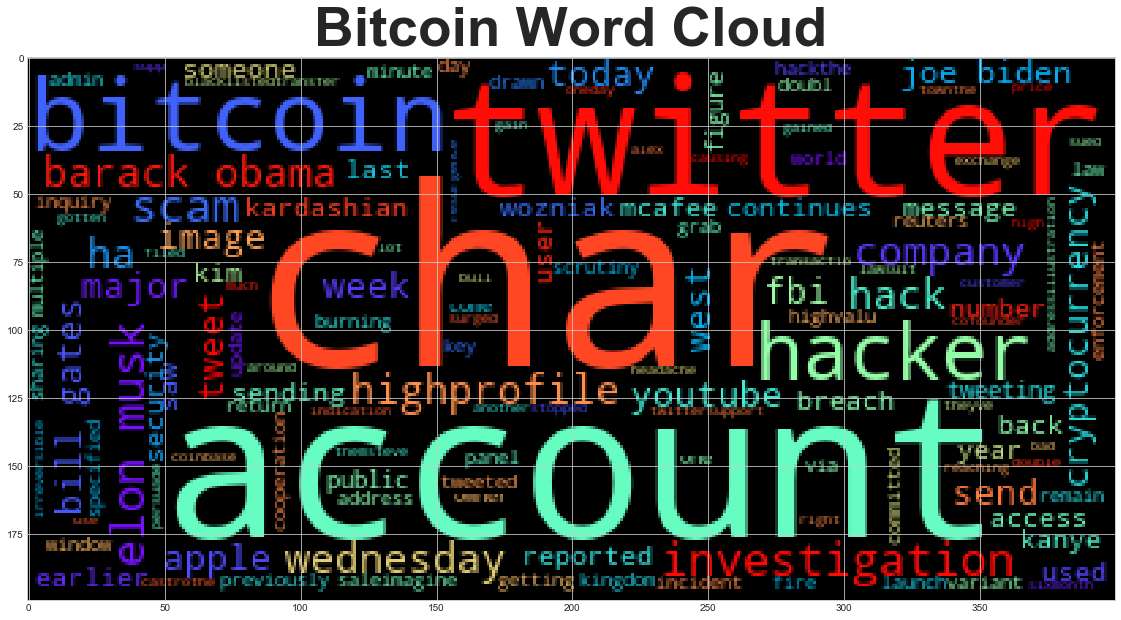

In [31]:
# Generate the Bitcoin word cloud
big_string = ' '.join([btc for bits in bitcoin_df['tokens'] for btc in bits])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Bitcoin Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

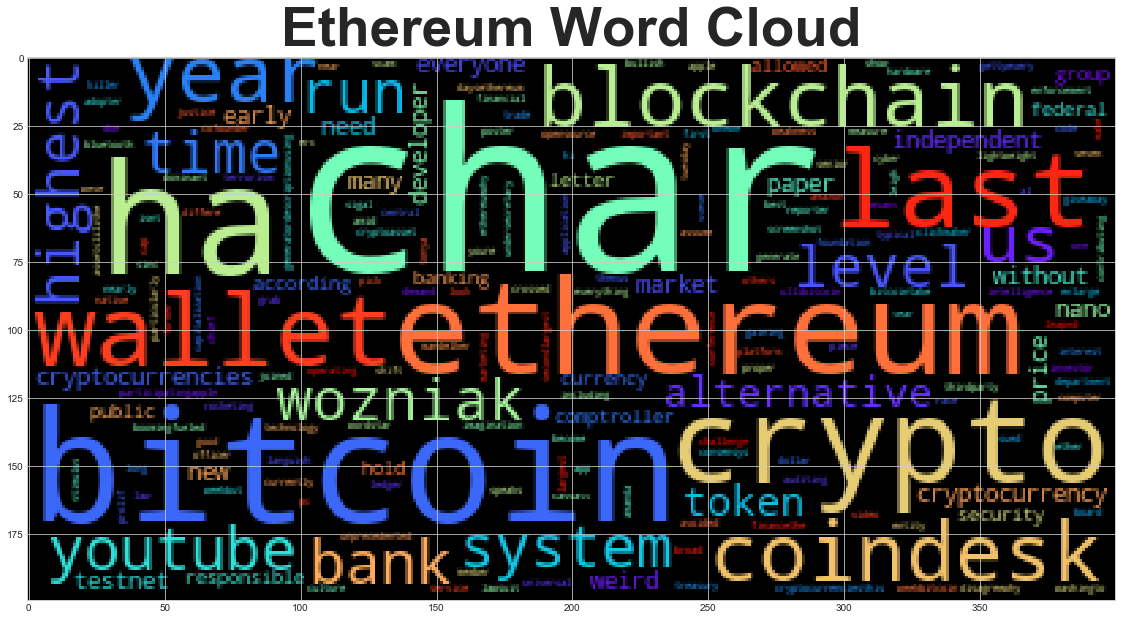

In [32]:
# Generate the Ethereum word cloud
big_string = ' '.join([eth for ets in ethereum_df['tokens'] for eth in ets])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Ethereum Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [36]:
# Concatenate all of the bitcoin text together

btc_all_corpus = bitcoin_df.text.sum()
btc_all_corpus

"Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars]Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars]Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars]The bitcoin bulls are back in town.\r\nThe price of bitcoin surged today by $1,268.19, reaching a six-month high of $11,203.90, or a one-d

In [37]:
# Run the NER processor on all of the text

doc = nlp(btc_all_corpus)

# Add a title to the document

doc.user_data["title"] = "Bitcoin NER"

In [38]:
# Render the visualization

displacy.render(doc, style='ent')

In [39]:
# List all Entities

for ent in doc.ents:
    print(ent.text, ent.label_)

Twitter ORG
FBI ORG
FBI ORG
one CARDINAL
Bitcoin GPE
30-minute TIME
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Alex Castro PERSON
Coinbase ORG
around 1,100 CARDINAL
Apple ORG
YouTube PRODUCT
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter ORG
YouTube PRODUCT
Wozniak PERSON
Kanye West GPE
Elon Musk ORG
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PERSON
Twitter PERSON
Wednesday DATE
millions CARDINAL
@rippl ORG
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
Twitter ORG
earlier this week DATE
last week DATE
Twitter ORG
today DATE
week DATE
100 CARDINAL
Twitter ORG
today DATE
the year DATE
John McAfee
  PERSON
Three years ago DATE
this date DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
Francisco ORG
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
Apple ORG
Wednesday DATE
Twitter ORG
earlier this afternoon TIME
Elon Musk ORG
Wednesday evening TIME
6 pm ET TIME
Twitter ORG
Barack 

---

## Ethereum NER

In [40]:
# Concatenate all of the bitcoin text together

eth_all_corpus = ethereum_df.text.sum()
eth_all_corpus

'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars]Enlarge/ A screenshot from Wozniak\'s lawsuit shows a typical "Bitcoin giveaway" scam video on YouTube.\r\n4 with 4 posters participating\r\nApple co-founder Steve Wozniak has sued YouTube over the prolif… [+3424 chars]Crypto has been on a tear in the last week.\r\nBitcoin is up 18% in the last seven days:\r\nEthereum is up over 30% in the last week:\r\nBut this isn’t the first time we’ve had a bullish run in crypto sinc… [+1941 chars]<ul><li>Bitcoin crossed the $11,000 level and trades near its highest level in nearly a year on Tuesday amid US dollar weakness and a broad shift to alternative assets.</li><li>The token leaped as hi… [+2656 chars]Interest in bitcoin and other cryptocurrencies, including ethereum, is boomingfueled by unprecedented central bank stimulus measur

In [41]:
# Run the NER processor on all of the text

doc1 = nlp(eth_all_corpus)

# Add a title to the document

doc1.user_data["title"] = "Ethereum NER"

In [42]:
# Render the visualization

displacy.render(doc1, style='ent')

In [43]:
# List all Entities

for ent in doc1.ents:
    print(ent.text, ent.label_)

U.S. GPE
Wozniak PERSON
Bitcoin GPE
YouTube PRODUCT
4 CARDINAL
4 CARDINAL
Apple ORG
Steve Wozniak PERSON
YouTube ORG
the last week DATE
Bitcoin GPE
18% PERCENT
the last seven days DATE
over 30% PERCENT
the last week DATE
first ORDINAL
Bitcoin GPE
11,000 MONEY
nearly a year DATE
Tuesday DATE
US GPE
bitcoin GPE
third ORDINAL
one CARDINAL
WordStar FAC
Apple ORG
Bitcoin GPE
Ethereum GPE
ERC20 ORG
The Ledger Nano X Bluetooth WORK_OF_ART
89.25 MONEY
Amazon ORG
Mandelker PERSON
U.S. Treasury ORG
2018 DATE
the Department of Justice ORG
Bitcoin GPE
a weird year DATE
year DATE
second ORDINAL
Maker Foundation ORG
Tonya Evans ORG
ConsenSys ORG
Amanda Cassatt PERSON
CoinDesk PERSON
Leigh Cuen PERSON
Monday DATE
Maythough ORG
10,000 MONEY
Wednesday DATE
end-of-year DATE
August 4 DATE
Medalla PERSON
CoinDesk PERSON
the last day DATE
Devcon ORG
October 2019 DATE
Osaka GPE
Japan GPE
roughly 1,000 CARDINAL
